In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Bar Charts

In [2]:
top = Table.read_table('top_movies_2020.csv')
top.set_format([1, 2], NumberFormatter)
top

Title                       | Gross (Adjusted) | Gross       | Studio          | Est. Num Tickets | Year
2001: A Space Odyssey       | 409,683,573      | 60,405,931  | MGM             | 43,722,900       | 1968
Airport                     | 619,462,881      | 100,489,151 | Universal       | 66,111,300       | 1970
Aladdin                     | 491,384,351      | 217,350,219 | Disney          | 52,442,300       | 1992
Alice in Wonderland         | 394,495,740      | 334,191,110 | Disney          | 42,102,000       | 2010
American Graffiti           | 615,742,991      | 115,000,000 | Universal       | 65,714,300       | 1973
American Sniper             | 403,659,600      | 350,126,372 | Warner Brothers | 43,080,000       | 2014
An Officer and a Gentleman  | 409,065,153      | 129,795,554 | Paramount       | 43,656,900       | 1982
Apollo 13                   | 373,466,649      | 173,837,933 | Universal       | 39,857,700       | 1995
Armageddon                  | 402,726,348      | 201,578,182 | Disney          | 42,980,400       | 1998
Around the World in 80 Days | 605,446,298      | 42,000,000  | United Artists  | 64,615,400       | 1956
... (190 rows omitted)

Use the `group` method to count how many times a categorical variable appears in a column

In [4]:
top.group('Studio').sort('count', descending=True)

Studio          | count
Disney          | 54
Paramount       | 26
Universal       | 24
Fox             | 23
Warner Brothers | 23
Columbia        | 9
MGM             | 7
Sony            | 6
United Artists  | 6
Newline         | 5
... (10 rows omitted)

How many of the top movies did each studio produce?

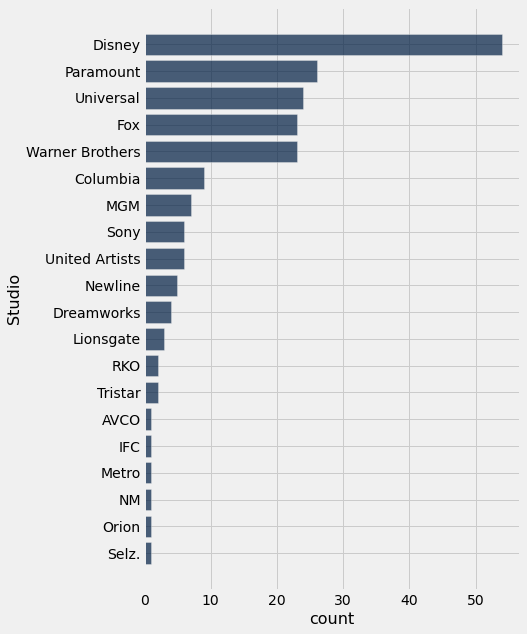

In [5]:
top.group('Studio').sort("count", descending=True).barh('Studio', 'count')

How old are each of these movies?

In [6]:
aged = top.with_column("Age", 2020-top.column('Year'))
aged

Title                       | Gross (Adjusted) | Gross       | Studio          | Est. Num Tickets | Year | Age
2001: A Space Odyssey       | 409,683,573      | 60,405,931  | MGM             | 43,722,900       | 1968 | 52
Airport                     | 619,462,881      | 100,489,151 | Universal       | 66,111,300       | 1970 | 50
Aladdin                     | 491,384,351      | 217,350,219 | Disney          | 52,442,300       | 1992 | 28
Alice in Wonderland         | 394,495,740      | 334,191,110 | Disney          | 42,102,000       | 2010 | 10
American Graffiti           | 615,742,991      | 115,000,000 | Universal       | 65,714,300       | 1973 | 47
American Sniper             | 403,659,600      | 350,126,372 | Warner Brothers | 43,080,000       | 2014 | 6
An Officer and a Gentleman  | 409,065,153      | 129,795,554 | Paramount       | 43,656,900       | 1982 | 38
Apollo 13                   | 373,466,649      | 173,837,933 | Universal       | 39,857,700       | 1995 | 25
Armageddon                  | 402,726,348      | 201,578,182 | Disney          | 42,980,400       | 1998 | 22
Around the World in 80 Days | 605,446,298      | 42,000,000  | United Artists  | 64,615,400       | 1956 | 64
... (190 rows omitted)

How many movies of each age are there?

In [7]:
aged.group('Age')

Age  | count
1    | 7
2    | 4
3    | 5
4    | 7
5    | 6
6    | 3
7    | 4
8    | 3
9    | 2
10   | 3
... (64 rows omitted)

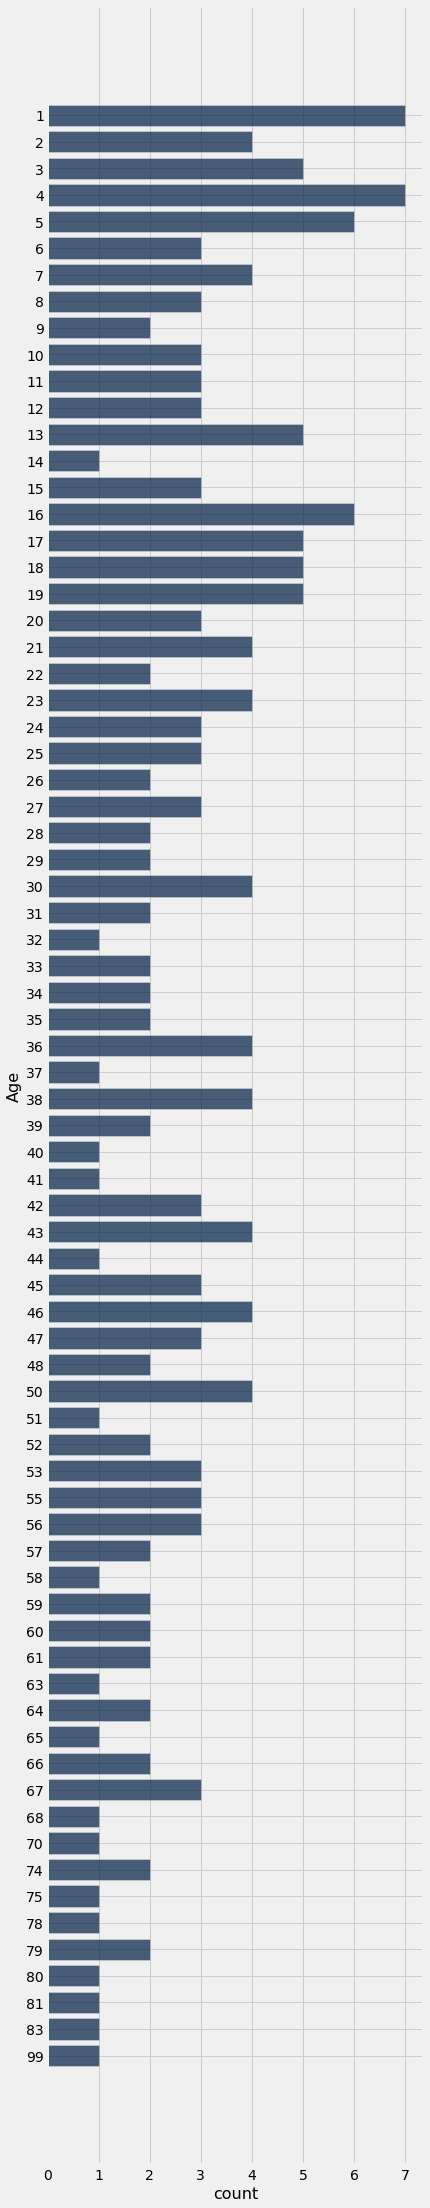

In [8]:
aged.group('Age').barh('Age', 'count')

## Histograms

In [9]:
aged.group('Age')

Age  | count
1    | 7
2    | 4
3    | 5
4    | 7
5    | 6
6    | 3
7    | 4
8    | 3
9    | 2
10   | 3
... (64 rows omitted)

The `bin` method groups numbers into 10 equally spaced bins

In [10]:
aged.bin('Age').show()

You can ask the `bin` method to use any bins you like

In [11]:
aged.bin('Age', bins=[0, 20, 40, 60, 80, 100])

bin  | Age count
0    | 80
20   | 52
40   | 43
60   | 21
80   | 4
100  | 0

How can I make the array `[0, 20, 40, 60, 80, 100]` with less typing?

In [14]:
np.arange(0,6)*20

array([  0,  20,  40,  60,  80, 100])

In [16]:
aged.bin("Age", bins=np.arange(0,101,20))

bin  | Age count
0    | 80
20   | 52
40   | 43
60   | 21
80   | 4
100  | 0

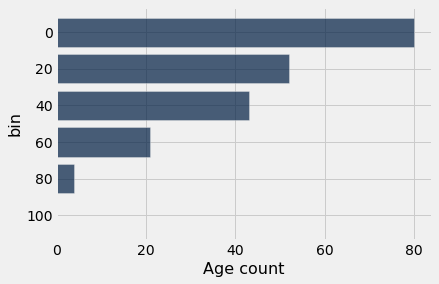

In [17]:
aged.bin('Age', bins=np.arange(0, 101, 20)).barh("bin")

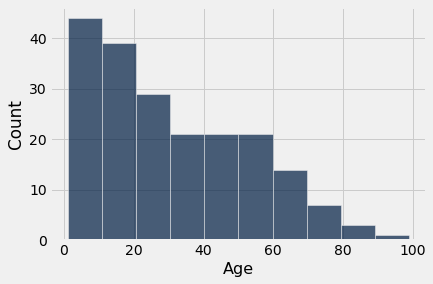

In [18]:
aged.hist('Age', normed=False)

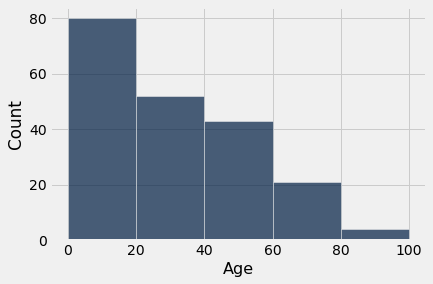

In [19]:
aged.hist('Age', bins=np.arange(0, 101, 20), normed=False)

What's going on in this picture?
* a) heights are proportional to counts in each bin
* b) areas are proportional to counts in each bin
* c) both heights and areas are proportional counts in each bin

# Uneven bins

There are lots of new movies, and few old movies, so let's change the bin sizes so we can see them better

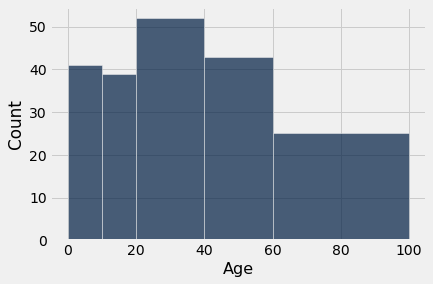

In [20]:
aged.hist('Age', bins=[0, 10, 20, 40, 60, 100], normed=False)

What's going on in this picture?
* a) heights represent counts in each bin
* b) areas represent counts in each bin
* c) both heights and areas represent counts in each bin

## Density

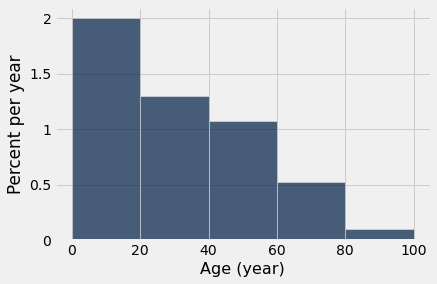

In [21]:
aged.hist('Age', bins=np.arange(0, 101, 20), unit='year')

What's going on in this picture?
* a) heights represent counts in each bin
* b) areas represent counts in each bin
* c) both heights and areas represent counts in each bin

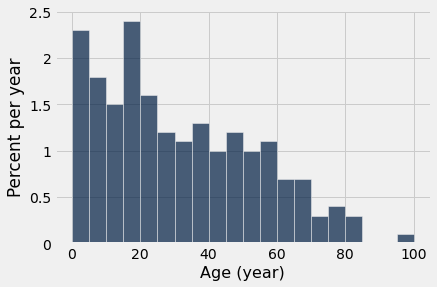

In [22]:
aged.hist('Age', bins=np.arange(0, 101, 5), unit='year')

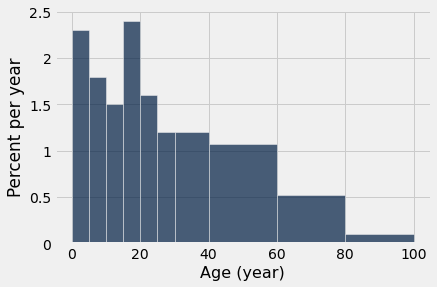

In [23]:
aged.hist('Age', bins=[0, 5, 10, 15, 20, 25, 30, 40, 60, 80, 100], unit='year')

What's going on in this picture?
* a) heights represent counts in each bin
* b) areas represent counts in each bin
* c) both heights and areas represent counts in each bin

In [ ]:
aged.hist('Age', bins=[0, 5, 10, 15, 20, 25, 30, 40, 60, 80, 100], normed=False) 

### Discussion question

In [25]:
actress = Table.read_table('actress.csv')

What's the height of each bar in these 
two histograms?
```
actress.hist(1, bins=[0,15,25,85])
actress.hist(1, bins=[0,15,35,85])
```

In [27]:
((9/20)*100)/15

3.0

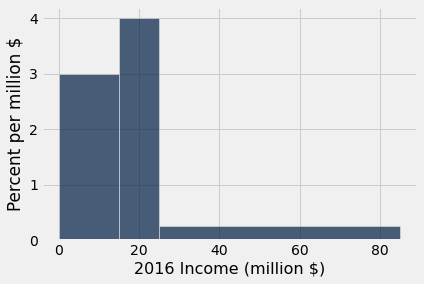

In [26]:
actress.hist(1, bins=[0,15,25,85], unit='million $')

In [ ]:
actress.hist(1, bins=[0,15,35,85], unit='million $')

## Overlaid Graphs

In [ ]:
heights = Table.read_table('galton.csv')
heights = heights.where('gender', 'female').select('father', 'mother', 'childHeight').relabeled(2, 'daughter')
heights

In [ ]:
heights.hist('daughter', unit='inch')

In [ ]:
heights.hist('mother', unit='inch')

In [ ]:
heights.hist('daughter', 'mother', unit='inch')
_ = plots.xlabel('Height (inches)')

In [ ]:
heights.hist(unit='inch')
_ = plots.xlabel('Height (inches)')

In [ ]:
heights.hist(bins=np.arange(55, 81, 1), unit='inch')
_ = plots.xlabel('Height (inches)')

In [ ]:
heights.scatter('mother', 'daughter')

In [ ]:
heights.scatter('daughter')